# Proyecto ML Ops 


#  ETL


In [2]:
import pandas as pd

In [3]:
# cargo el DataSet
df_movies = pd.read_csv('movies_dataset.csv', low_memory=False)

In [4]:
pd.options.display.max_columns = None   # para ver todas las columnas 

In [5]:
df_movies.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


## Borro columnas innecesarias

In [6]:
columnas_innecesarias = ['video','imdb_id','adult','original_title','vote_count','poster_path','homepage']

df_movies = df_movies.drop(columnas_innecesarias, axis=1)

## relleno los nulos con 0

In [7]:
col_null = ['revenue', 'budget']
df_movies[col_null] = df_movies[col_null].fillna(0)

In [8]:
# verifico los nulos 
df_movies.isnull().sum()

belongs_to_collection    40972
budget                       0
genres                       0
id                           0
original_language           11
overview                   954
popularity                   5
production_companies         3
production_countries         3
release_date                87
revenue                      0
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
vote_average                 6
dtype: int64

## elimino nulos en "release_date"

In [9]:
df_movies.dropna(subset=['release_date'], inplace=True)

tengo valores erroneos que no se pueden convertir a fecha en 'release_date'


In [10]:
# quito valores erroneos  
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'], errors='coerce')

In [11]:
# verifico estos valores a ver si se pueden remplazar  
df_movies[df_movies['release_date'].isnull()]

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average
19730,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...",1997-08-20,104.0,Released,NaN,False,6.0,NaT,0.0,NaN,NaN,NaN,NaN,NaN,NaN
29503,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...",2012-09-29,68.0,Released,NaN,False,7.0,NaT,0.0,NaN,NaN,NaN,NaN,NaN,NaN
35587,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...",2014-01-01,82.0,Released,Beware Of Frost Bites,False,4.3,NaT,0.0,NaN,NaN,NaN,NaN,NaN,NaN


 veo que son filas con data erronea o nula casi en la totalidad de sus campos 

In [12]:
# elimino nulos nuevamente 
df_movies.dropna(subset=['release_date'], inplace=True)

## Crear una nueva columna con el año extraído de "release_date"

In [13]:
df_movies['release_year'] = df_movies['release_date'].dt.year

In [14]:
# verifico columna y tipo de dato 
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45376 entries, 0 to 45465
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  4488 non-null   object        
 1   budget                 45376 non-null  object        
 2   genres                 45376 non-null  object        
 3   id                     45376 non-null  object        
 4   original_language      45365 non-null  object        
 5   overview               44435 non-null  object        
 6   popularity             45376 non-null  object        
 7   production_companies   45376 non-null  object        
 8   production_countries   45376 non-null  object        
 9   release_date           45376 non-null  datetime64[ns]
 10  revenue                45376 non-null  float64       
 11  runtime                45130 non-null  float64       
 12  spoken_languages       45376 non-null  object        
 13  s

## agrego columna "return"

In [15]:
# convierto la columna en numerica para poder hacer el calculo  
# se usa to_numeric  porque hay datos que no se pueden convertir como imagenes   

df_movies['budget'] = pd.to_numeric(df_movies['budget'], errors='coerce')

# Reemplazo los valores nulos por 0 
df_movies['budget'] = df_movies['budget'].fillna(0)

In [16]:
# Defino una función lambda que realice la operación de división y valide los valores de cero

df_movies['return'] = df_movies.apply(lambda row: row['revenue'] / row['budget'] 
                                      if row['revenue'] != 0 and row['budget'] != 0 else 0, axis=1)

In [17]:
df_movies.head(4)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,release_year,return
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,1995,12.451801
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,1995,4.043035
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,1995,0.000000
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,1995,5.090760


## desanidar datos


In [18]:
# funcion para optener el los nombre de los obetos anidados  

def get_object_names(x):
    try:
        object_list = eval(x)
        object_names = [object_dict['name'] for object_dict in object_list]
        return ', '.join(object_names)
    except:
        return 'sin dato'

In [19]:
# creo una nueva columna con los nombre de los paises productores  
df_movies['country_name'] = df_movies['production_countries'].apply(get_object_names)

In [20]:
# creo una nueva columna con los nombre de las productoras
df_movies['name_production_compani'] = df_movies['production_companies'].apply(get_object_names)

In [21]:
# creo nueva columna para generos 
df_movies['name_genres'] = df_movies['genres'].apply(get_object_names)

In [22]:
# creo nueva columna para idiomas 
df_movies['name_languages'] = df_movies['spoken_languages'].apply(get_object_names)

In [23]:
df_movies.head(3)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,release_year,return,country_name,name_production_compani,name_genres,name_languages
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,1995,12.451801,United States of America,Pixar Animation Studios,"Animation, Comedy, Family",English
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,1995,4.043035,United States of America,"TriStar Pictures, Teitler Film, Interscope Com...","Adventure, Fantasy, Family","English, Français"
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,1995,0.000000,United States of America,"Warner Bros., Lancaster Gate","Romance, Comedy",English


In [24]:
# funcion para optener el nombre de la franquicia 
def get_object_names2(x):
    try:
        object_dict = eval(x)
        object_name = object_dict['name']
        return object_name
    except:
        return 'sin dato'

In [25]:
# creo columna con el nombre de la franquicia 
df_movies['name_franquicia'] = df_movies['belongs_to_collection'].apply(get_object_names2)

## columnas con nombre del dia y mes en español

In [26]:
# importo librerias 
from datetime import datetime
import locale

In [27]:
# configuracion en español
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

'es_ES.UTF-8'

In [28]:
# creo columna con el nombre de dia y mes 
df_movies['dia_es'] = df_movies['release_date'].apply(lambda x: datetime.strftime(x, '%A'))
df_movies['mes_es'] = df_movies['release_date'].apply(lambda x: datetime.strftime(x, '%B'))

In [29]:
df_movies.head(3)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,release_year,return,country_name,name_production_compani,name_genres,name_languages,name_franquicia,dia_es,mes_es
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,1995,12.451801,United States of America,Pixar Animation Studios,"Animation, Comedy, Family",English,Toy Story Collection,lunes,octubre
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,1995,4.043035,United States of America,"TriStar Pictures, Teitler Film, Interscope Com...","Adventure, Fantasy, Family","English, Français",sin dato,viernes,diciembre
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,1995,0.000000,United States of America,"Warner Bros., Lancaster Gate","Romance, Comedy",English,Grumpy Old Men Collection,viernes,diciembre


In [30]:
# verifico que algunos dias tienen errores 
df_movies.groupby('dia_es').size().reset_index(name='cantidad')


,dia_es,cantidad
0,domingo,3613
1,jueves,7525
2,lunes,3503
3,martes,4641
4,miÃ©rcoles,7035
5,sÃ¡bado,5151
6,viernes,13908


In [31]:
# df['dia'] = df['dia'].replace(nombres_nuevos)
remplazar = {'miÃ©rcoles':'miercoles', 'sÃ¡bado':'sabado'}
df_movies['dia_es'] = df_movies['dia_es'].replace(remplazar)

## borro columnas con data duplicada  

In [32]:
data_duplicada = ['belongs_to_collection', 'genres', 'production_companies', 'production_countries', 'spoken_languages']

df_movies = df_movies.drop(data_duplicada, axis=1)

In [33]:
df_movies.head(3)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,release_year,return,country_name,name_production_compani,name_genres,name_languages,name_franquicia,dia_es,mes_es
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,1995,12.451801,United States of America,Pixar Animation Studios,"Animation, Comedy, Family",English,Toy Story Collection,lunes,octubre
1,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,1995,4.043035,United States of America,"TriStar Pictures, Teitler Film, Interscope Com...","Adventure, Fantasy, Family","English, Français",sin dato,viernes,diciembre
2,0,15602,en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,1995,0.000000,United States of America,"Warner Bros., Lancaster Gate","Romance, Comedy",English,Grumpy Old Men Collection,viernes,diciembre


In [34]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45376 entries, 0 to 45465
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   budget                   45376 non-null  int64         
 1   id                       45376 non-null  object        
 2   original_language        45365 non-null  object        
 3   overview                 44435 non-null  object        
 4   popularity               45376 non-null  object        
 5   release_date             45376 non-null  datetime64[ns]
 6   revenue                  45376 non-null  float64       
 7   runtime                  45130 non-null  float64       
 8   status                   45296 non-null  object        
 9   tagline                  20398 non-null  object        
 10  title                    45376 non-null  object        
 11  vote_average             45376 non-null  float64       
 12  release_year             45376 n

 - exporto a un CSV para ser consumido por la API
 

In [31]:
df_movies.to_csv('movies_etl-1.csv', index=False)

# EDA

In [36]:
# numero de filas faltantes en cada columna
df_movies.isnull().sum().sort_values(ascending=False)

tagline                    24978
overview                     941
runtime                      246
status                        80
original_language             11
budget                         0
return                         0
dia_es                         0
name_franquicia                0
name_languages                 0
name_genres                    0
name_production_compani        0
country_name                   0
title                          0
release_year                   0
vote_average                   0
id                             0
revenue                        0
release_date                   0
popularity                     0
mes_es                         0
dtype: int64

In [34]:
# % de filas faltantes de cada columna 

for column in df_movies.columns:
    percentage = df_movies[column].isnull().mean()  
    print(column + ': ' + str(round(percentage*100, 2))) 

budget: 0.0
id: 0.0
original_language: 0.02
overview: 2.07
popularity: 0.0
release_date: 0.0
revenue: 0.0
runtime: 0.54
status: 0.18
tagline: 55.05
title: 0.0
vote_average: 0.0
release_year: 0.0
return: 0.0
country_name: 0.0
name_production_compani: 0.0
name_genres: 0.0
name_languages: 0.0
name_franquicia: 0.0
dia_es: 0.0
mes_es: 0.0


 - podemos apreciar que hay al menos  1 columna "tagline"  que tiene data faltante significativa(55%) 
 
   esta columna guarda datos de (Frase celebre asociadaa la pelicula)
   

 -  overview / Pequenio resumen de la pelicula 

- runtime / Duración de la película, en minutos 

- status / Estado de la pelicula actual (si fue anunciada, si ya se estreno, etc)

- original_language / lenguaje original  - la data faltante es minima

# Identifico Valores Atipicos 

## Valores atipocos en duracion de pelicula 

<AxesSubplot:ylabel='Frequency'>

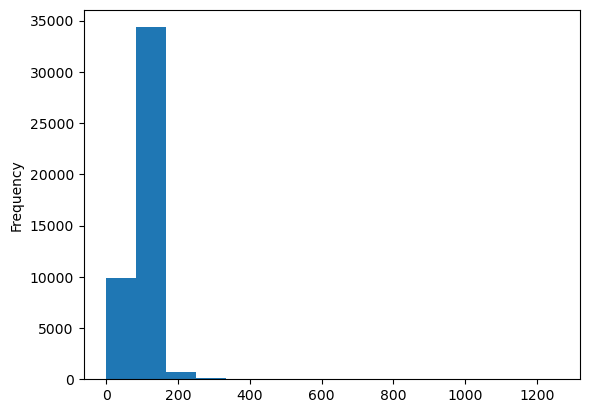

In [37]:
# histograma  
df_movies['runtime'].plot(kind='hist', bins=15)

In [65]:
# detalle 
df_movies['runtime'].value_counts(bins=20).sort_index()

(-1.257, 62.8]       3897
(62.8, 125.6]       36658
(125.6, 188.4]       3458
(188.4, 251.2]        246
(251.2, 314.0]         72
(314.0, 376.8]         42
(376.8, 439.6]         18
(439.6, 502.4]         15
(502.4, 565.2]          8
(565.2, 628.0]          5
(628.0, 690.8]          3
(690.8, 753.6]          2
(753.6, 816.4]          1
(816.4, 879.2]          4
(879.2, 942.0]          3
(942.0, 1004.8]         0
(1004.8, 1067.6]        0
(1067.6, 1130.4]        0
(1130.4, 1193.2]        2
(1193.2, 1256.0]        1
Name: runtime, dtype: int64

In [80]:
# df_movies[~((df_movies['runtime']>30) & (df_movies['runtime']<251))]
# df_movies[df_movies['runtime']>251]
# df_movies[df_movies['runtime'] == 0]


In [165]:
# filtro datos muy atipicos  
df_movies = df_movies[((df_movies['runtime']>30) & (df_movies['runtime']<251))]

In [84]:
df_movies['runtime'].value_counts(bins=20).sort_index()

(30.779999999999998, 41.95]      188
(41.95, 52.9]                    413
(52.9, 63.85]                    924
(63.85, 74.8]                   1597
(74.8, 85.75]                   5602
(85.75, 96.7]                  13121
(96.7, 107.65]                  9390
(107.65, 118.6]                 4881
(118.6, 129.55]                 2626
(129.55, 140.5]                 1282
(140.5, 151.45]                  607
(151.45, 162.4]                  373
(162.4, 173.35]                  264
(173.35, 184.3]                  245
(184.3, 195.25]                   92
(195.25, 206.2]                   54
(206.2, 217.15]                   45
(217.15, 228.1]                   23
(228.1, 239.05]                   25
(239.05, 250.0]                   44
Name: runtime, dtype: int64

<AxesSubplot:>

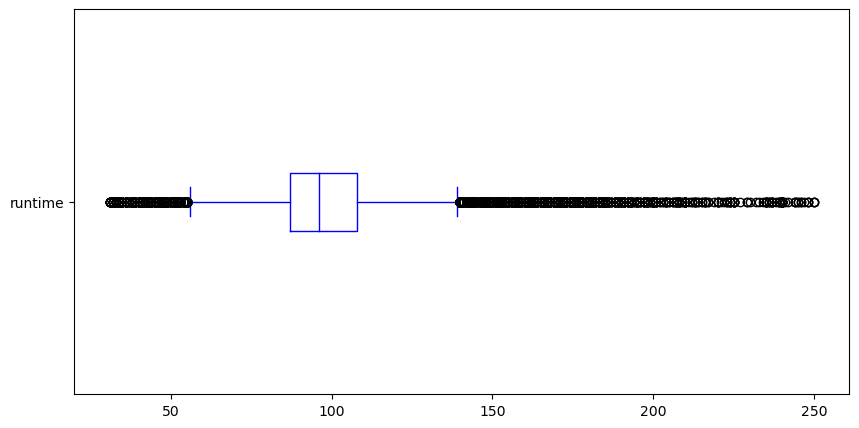

In [83]:
# boxplot para ver mejor los valores atipicos 
df_movies['runtime'].plot(kind='box', vert=False, color='blue',
                        figsize=(10,5))

In [166]:
# filtro datos atipicos  
df_movies = df_movies[((df_movies['runtime']>60) & (df_movies['runtime']<140))]

In [88]:
df_movies.shape

(38624, 19)

## valores atipicos en puntage promedio


<AxesSubplot:ylabel='Frequency'>

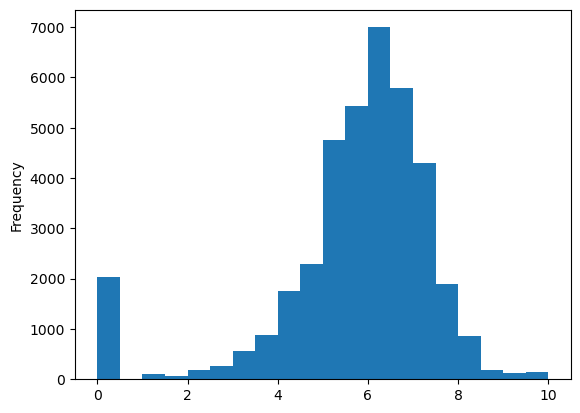

In [93]:
# histograma  
df_movies['vote_average'].plot(kind='hist', bins=20)

In [91]:
df_movies['vote_average'].value_counts(bins=20).sort_index()

(-0.011, 0.5]    2052
(0.5, 1.0]         78
(1.0, 1.5]         44
(1.5, 2.0]        125
(2.0, 2.5]        198
(2.5, 3.0]        380
(3.0, 3.5]        567
(3.5, 4.0]       1243
(4.0, 4.5]       1622
(4.5, 5.0]       3540
(5.0, 5.5]       4272
(5.5, 6.0]       6301
(6.0, 6.5]       6410
(6.5, 7.0]       5788
(7.0, 7.5]       3452
(7.5, 8.0]       1790
(8.0, 8.5]        424
(8.5, 9.0]        177
(9.0, 9.5]         30
(9.5, 10.0]       131
Name: vote_average, dtype: int64

- popularity

In [167]:
 #Convierto la columna "popularity" a float
df_movies['popularity'] = df_movies['popularity'].astype(float)

In [99]:
df_movies.dtypes

budget                              int64
id                                 object
original_language                  object
overview                           object
popularity                        float64
release_date               datetime64[ns]
revenue                           float64
runtime                           float64
title                              object
vote_average                      float64
release_year                        int64
return                            float64
country_name                       object
name_production_compani            object
name_genres                        object
name_languages                     object
name_franquicia                    object
dia_es                             object
mes_es                             object
dtype: object

In [101]:
df_movies['popularity'].value_counts(bins=20).sort_index()

(-0.548, 27.374]      38524
(27.374, 54.749]         78
(54.749, 82.123]         10
(82.123, 109.498]         3
(109.498, 136.872]        1
(136.872, 164.246]        1
(164.246, 191.621]        3
(191.621, 218.995]        1
(218.995, 246.37]         1
(246.37, 273.744]         0
(273.744, 301.119]        1
(301.119, 328.493]        0
(328.493, 355.867]        0
(355.867, 383.242]        0
(383.242, 410.616]        0
(410.616, 437.991]        0
(437.991, 465.365]        0
(465.365, 492.739]        0
(492.739, 520.114]        0
(520.114, 547.488]        1
Name: popularity, dtype: int64

In [168]:
# filtro datos atipicos  
df_movies = df_movies[df_movies['popularity']<82.123]

In [108]:
df_movies['popularity'].value_counts(bins=20).sort_index()

(-0.0798, 3.94]     28503
(3.94, 7.881]        5455
(7.881, 11.821]      3034
(11.821, 15.761]     1126
(15.761, 19.702]      288
(19.702, 23.642]       80
(23.642, 27.583]       40
(27.583, 31.523]       23
(31.523, 35.463]       18
(35.463, 39.404]       15
(39.404, 43.344]        9
(43.344, 47.284]        4
(47.284, 51.225]        4
(51.225, 55.165]        3
(55.165, 59.105]        0
(59.105, 63.046]        2
(63.046, 66.986]        2
(66.986, 70.926]        2
(70.926, 74.867]        1
(74.867, 78.807]        3
Name: popularity, dtype: int64

<AxesSubplot:>

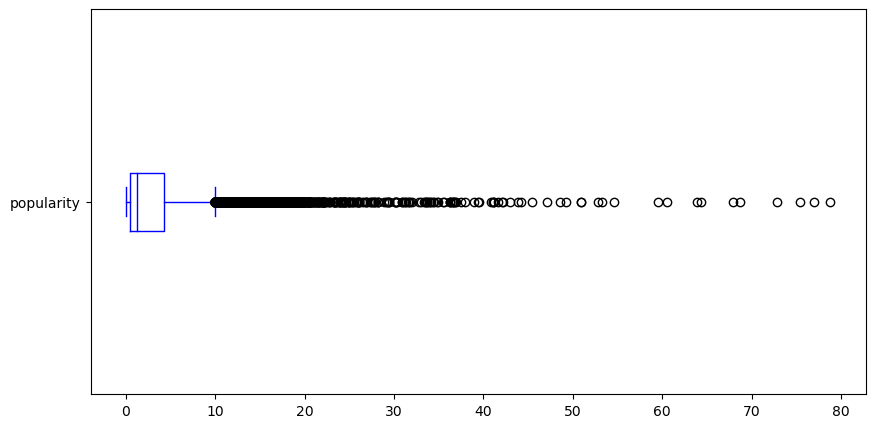

In [107]:
# boxplot para ver mejor los valores atipicos 
df_movies['popularity'].plot(kind='box', vert=False, color='blue',
                        figsize=(10,5))

In [169]:
# filtro datos atipicos  
df_movies = df_movies[df_movies['popularity']<11.80]


In [38]:
df_movies.shape

(45376, 21)

- visualizacion por mes 

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

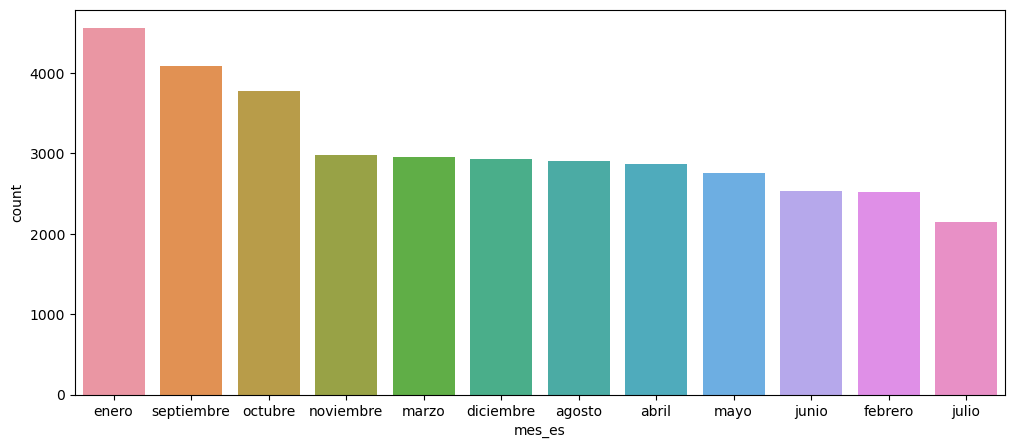

In [121]:
plt.figure(figsize=(12, 5))
sns.countplot(x='mes_es', data=df_movies, order=df_movies['mes_es'].value_counts().index)
plt.show()

In [39]:
# normalizar titulos a minisculas para mejorar busquedas  
df_movies['title'] = df_movies['title'].str.lower()

In [40]:
# eliminar espacios delanteros y finales con el metodo strip()
df_movies['title'] = df_movies['title'].str.strip()

In [41]:
df_movies.tail(3)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,release_year,return,country_name,name_production_compani,name_genres,name_languages,name_franquicia,dia_es,mes_es
45463,0,67758,en,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01,0.0,90.0,Released,A deadly game of wits.,betrayal,3.8,2003,0.0,United States of America,American World Pictures,"Action, Drama, Thriller",English,sin dato,viernes,agosto
45464,0,227506,en,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,0.0,87.0,Released,NaN,satan triumphant,0.0,1917,0.0,Russia,Yermoliev,,,sin dato,domingo,octubre
45465,0,461257,en,50 years after decriminalisation of homosexual...,0.163015,2017-06-09,0.0,75.0,Released,NaN,queerama,0.0,2017,0.0,United Kingdom,,,English,sin dato,viernes,junio
